In [1]:
#Importing dependencies

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Adding the latitudes and longitudes to a list. 

coordinates = list(lat_lngs)

In [4]:
#Use the citypy module to determine city based on latitude and longitude.

from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
#Importing the requests library. 
import requests

#Importing the API key. 
from config import weather_api_key

#Importing the datetime module form the datetime library
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Create an empty list to hold the weather data. 

city_data = []

#Print the beginning of the logging. 
print('Beginning Data Retrieval     ')
print('-----------------------------')

#Create counters. 
record_count = 1 
set_count = 1

#Looping through all the cities in our list. 

for i,city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city. 
    city_url = url + '&q=' + city.replace(' ','+')

    #Log the URL, record, and set numbers and the city. 
    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    #Add 1 to the record count. 
    record_count += 1

    #Run an API 

    try:
        #Parse the JSON and retrieve data. 
        city_weather = requests.get(city_url).json()
        #Parse out the needed data. 
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard. 
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into the city_data list. 
        city_data.append({"City": city.title(),
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp, 
                        "Humidity": city_humidity, 
                        "Cloudiness": city_clouds, 
                        "Wind Speed": city_wind,
                        "Country": city_country, 
                        "Date": city_date})
        #If an error is experienced, skip the city
    except:
        print('City not found. Skipping...')
        pass

#Indicate the Data loading is complete
print('---------------------------')
print('Data Retrieval Complete    ')
print('---------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shirokiy
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | victoria point
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | estevan
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | provideniya
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | calvinia
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | mangrol
Processing Record 21 of Set 1 | namibe
Processing Record 22 of Set 1 | mana
Processing Record 23 of Set 1 | catamarca
Pro

Processing Record 41 of Set 4 | bayir
Processing Record 42 of Set 4 | dawei
Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | gua musang
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | rio grande
Processing Record 47 of Set 4 | grand centre
City not found. Skipping...
Processing Record 48 of Set 4 | hun
Processing Record 49 of Set 4 | lorengau
Processing Record 50 of Set 4 | gwanda
Processing Record 1 of Set 5 | russkaya polyana
Processing Record 2 of Set 5 | mont-de-marsan
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | puerto quijarro
Processing Record 5 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 5 | tautira
Processing Record 7 of Set 5 | lakes entrance
Processing Record 8 of Set 5 | cherskiy
Processing Record 9 of Set 5 | arlit
Processing Record 10 of Set 5 | yatou
Processing Record 11 of Set 5 | sitka
Processing Record 12 of Set 5 | sept-iles
Processing Record 13 of Set 5 | jac

Processing Record 32 of Set 8 | meulaboh
Processing Record 33 of Set 8 | labuan
Processing Record 34 of Set 8 | san luis
Processing Record 35 of Set 8 | talnakh
Processing Record 36 of Set 8 | bam
Processing Record 37 of Set 8 | kaeo
Processing Record 38 of Set 8 | ternate
Processing Record 39 of Set 8 | abu samrah
Processing Record 40 of Set 8 | eydhafushi
Processing Record 41 of Set 8 | faya
Processing Record 42 of Set 8 | yumen
Processing Record 43 of Set 8 | qadian
Processing Record 44 of Set 8 | tura
Processing Record 45 of Set 8 | sawtell
Processing Record 46 of Set 8 | oni
Processing Record 47 of Set 8 | ayr
Processing Record 48 of Set 8 | kahului
Processing Record 49 of Set 8 | port augusta
Processing Record 50 of Set 8 | novoye leushino
Processing Record 1 of Set 9 | gravdal
Processing Record 2 of Set 9 | san rafael del sur
Processing Record 3 of Set 9 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 9 | bosaso
Processing Record 5 of Set 9 | san blas
Proce

Processing Record 21 of Set 12 | takoradi
Processing Record 22 of Set 12 | harper
Processing Record 23 of Set 12 | rangapara
Processing Record 24 of Set 12 | neuquen
Processing Record 25 of Set 12 | ahuimanu
Processing Record 26 of Set 12 | arica
Processing Record 27 of Set 12 | jinchang
Processing Record 28 of Set 12 | yazykovo
Processing Record 29 of Set 12 | miri
Processing Record 30 of Set 12 | camacupa
Processing Record 31 of Set 12 | praia da vitoria
Processing Record 32 of Set 12 | lima
Processing Record 33 of Set 12 | vangaindrano
Processing Record 34 of Set 12 | berlevag
Processing Record 35 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 36 of Set 12 | husavik
Processing Record 37 of Set 12 | sterling
Processing Record 38 of Set 12 | bitung
Processing Record 39 of Set 12 | pokosnoye
Processing Record 40 of Set 12 | opotiki
Processing Record 41 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 12 | caravelas
Processing Record 43 o

In [9]:
#Converting the array of dictionaries into a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shirokiy,49.7580,129.5230,56.05,54,12,4.92,RU,2021-05-26 01:06:07
1,New Norfolk,-42.7826,147.0587,55.92,49,100,10.83,AU,2021-05-26 01:06:07
2,Lebu,-37.6167,-73.6500,54.19,89,100,5.64,CL,2021-05-26 01:06:07
3,Punta Arenas,-53.1500,-70.9167,35.71,75,20,12.55,CL,2021-05-26 01:03:08
4,Saint-Philippe,-21.3585,55.7679,72.95,85,44,7.83,RE,2021-05-26 01:02:20
5,Victoria Point,-27.5833,153.3000,76.17,72,0,4.00,AU,2021-05-26 01:06:08
6,Bethel,41.3712,-73.4140,69.30,74,1,3.44,US,2021-05-26 01:06:08
7,Tuktoyaktuk,69.4541,-133.0374,32.41,79,100,3.44,CA,2021-05-26 01:06:09
8,Hilo,19.7297,-155.0900,83.28,77,90,13.80,US,2021-05-26 01:03:37
9,Mataura,-46.1927,168.8643,49.48,44,100,2.44,NZ,2021-05-26 01:06:09


In [10]:
#Reordering the columns

new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shirokiy,RU,2021-05-26 01:06:07,49.7580,129.5230,56.05,54,12,4.92
1,New Norfolk,AU,2021-05-26 01:06:07,-42.7826,147.0587,55.92,49,100,10.83
2,Lebu,CL,2021-05-26 01:06:07,-37.6167,-73.6500,54.19,89,100,5.64
3,Punta Arenas,CL,2021-05-26 01:03:08,-53.1500,-70.9167,35.71,75,20,12.55
4,Saint-Philippe,RE,2021-05-26 01:02:20,-21.3585,55.7679,72.95,85,44,7.83
5,Victoria Point,AU,2021-05-26 01:06:08,-27.5833,153.3000,76.17,72,0,4.00
6,Bethel,US,2021-05-26 01:06:08,41.3712,-73.4140,69.30,74,1,3.44
7,Tuktoyaktuk,CA,2021-05-26 01:06:09,69.4541,-133.0374,32.41,79,100,3.44
8,Hilo,US,2021-05-26 01:03:37,19.7297,-155.0900,83.28,77,90,13.80
9,Mataura,NZ,2021-05-26 01:06:09,-46.1927,168.8643,49.48,44,100,2.44


In [11]:
#Creating the output file
output_data_file = 'weather_data/cities.csv'

#Exporint the City_Data into a CSV. 

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [13]:
#Extract the relevant fields from the DataFrame for plotting.

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

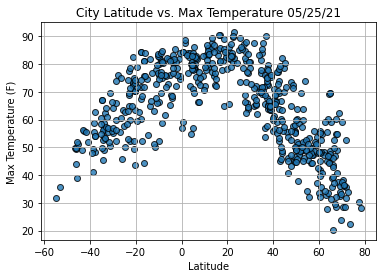

In [14]:
#Importing time module.

import time

#Building the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#Incorporating the other graph properties.

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure.
plt.savefig('weather_data/Fig1.png')

#Showing the plot.
plt.show()

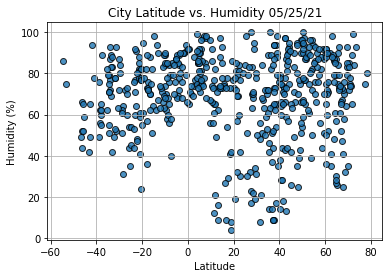

In [15]:
#Building the scatter plots for latitude vs. humidity.

plt.scatter(lats,
           humidity,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8,label='Cities')

#Incorporate the other graph properties. 
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure.
plt.savefig('weather_data/Fig2.png')

#Showing the plot.
plt.show()

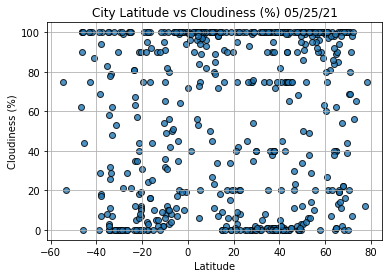

In [16]:
#Building the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#Incorporate the other graph properties.

plt.title(f'City Latitude vs Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure.
plt.savefig('weather_data/Fig3.png')

#Showing the plot.
plt.show()

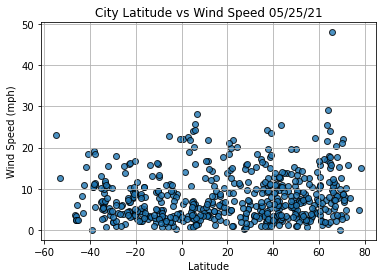

In [17]:
#Building the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label = 'Cities')

#Incorporating the other graph properties. 

plt.title(f'City Latitude vs Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure.
plt.savefig('weather_data/Fig4.png')

#Showing plot.
plt.show()

In [32]:
#Importing linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Running regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    
    #Calculate the regression line 'y_values' from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    #Getting the equation of the line.
    
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    
    #Creating a scatter plot and plot the regression line.
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,'r')
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq,text_coordinates,fontsize=15,color='red')
    plt.xlabel('latitude')
    plt.ylabel(y_label)
    plt.show()


In [33]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-05-26 01:06:10
Lat                         -54.8
Lng                         -68.3
Max Temp                    31.66
Humidity                       86
Cloudiness                     75
Wind Speed                  23.02
Name: 13, dtype: object

In [34]:
city_data_df['Lat'] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
546     True
547     True
548    False
549    False
550     True
Name: Lat, Length: 551, dtype: bool

In [35]:
#Creating the Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

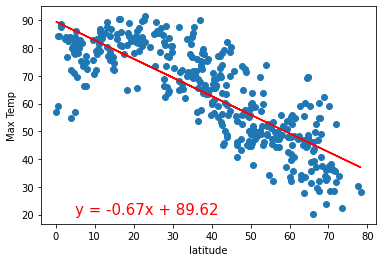

In [39]:
#Linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Calling the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,20))

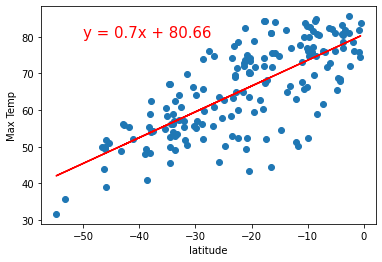

In [41]:
#Linear regression on the Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Calling the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

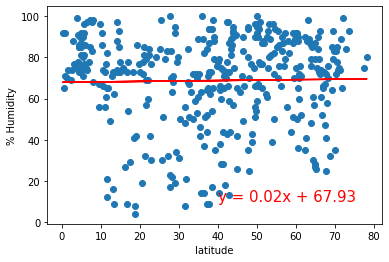

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

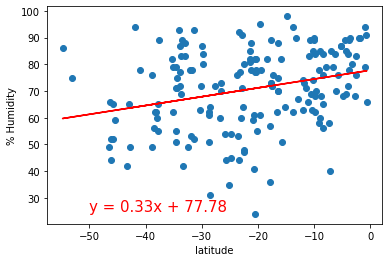

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,25))

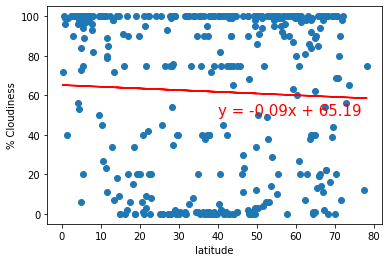

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,50))

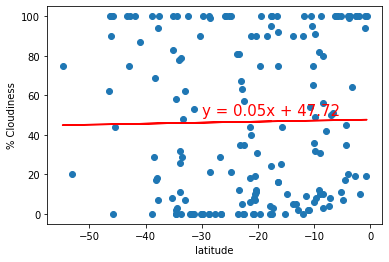

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-30,50))

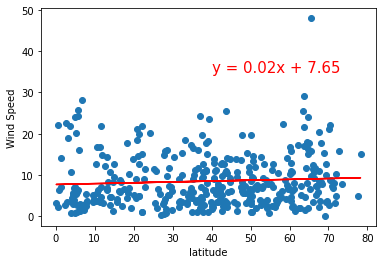

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

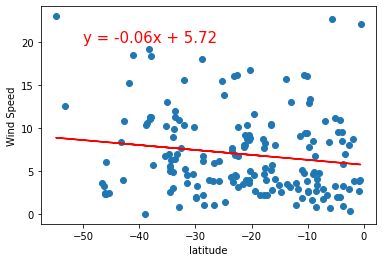

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))